In [42]:
# EDA Notebook
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [43]:
# Set path to project root so we can import from src/
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.utils import load_appliance_energy_data


df = load_appliance_energy_data()
df.head()


date  lights     T1       RH_1    T2       RH_2     T3  \
0  2016-01-11T17:00:00      30  19.89  47.596667  19.2  44.790000  19.79   
1  2016-01-11T17:10:00      30  19.89  46.693333  19.2  44.722500  19.79   
2  2016-01-11T17:20:00      30  19.89  46.300000  19.2  44.626667  19.79   
3  2016-01-11T17:30:00      40  19.89  46.066667  19.2  44.590000  19.79   
4  2016-01-11T17:40:00      40  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4  ...   RH_9  T_out  Press_mm_hg  RH_out  \
0  44.730000  19.000000  45.566667  ...  45.53   6.60        733.5    92.0   
1  44.790000  19.000000  45.992500  ...  45.56   6.48        733.6    92.0   
2  44.933333  18.926667  45.890000  ...  45.50   6.37        733.7    92.0   
3  45.000000  18.890000  45.723333  ...  45.40   6.25        733.8    92.0   
4  45.000000  18.890000  45.530000  ...  45.40   6.13        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  Appliances  
0   7.000000   63.000000        5.3  13.275433  13.275433          60  
1   6.666667   59.166667        5.2  18.606195  18.606195          60  
2   6.333333   55.333333        5.1  28.642668  28.642668          50  
3   6.000000   51.500000        5.0  45.410390  45.410390          50  
4   5.666667   47.666667        4.9  10.084097  10.084097          60  

[5 rows x 29 columns]

In [44]:
df = df.drop(columns=['lights'])

In [45]:
# Check for missing values
df.isnull().sum()

date           0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Appliances     0
dtype: int64

In [46]:
# Summary statistics for all numeric columns
df.describe().T

count        mean         std         min         25%  \
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.412580    5.318464   -5.000000    3.670000   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760995    4.195248   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   

                    50%         75%          max  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.920000   10.400000    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.430000    6.570000    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530  
Appliances    60.000000  100.000000  1080.000000

In [47]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # forces parsing
# Extracting Features from the datetime column
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

In [48]:
# Separate numerical and categorical, dependent variable
numerical_features = df.select_dtypes(include='number')
categorical = df.select_dtypes(include='object')
dependent_variable = df['Appliances']

In [49]:
df.head()

date     T1       RH_1    T2       RH_2     T3       RH_3  \
0 2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1 2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2 2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3 2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4 2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4         T5  ...  Tdewpoint        rv1        rv2  \
0  19.000000  45.566667  17.166667  ...        5.3  13.275433  13.275433   
1  19.000000  45.992500  17.166667  ...        5.2  18.606195  18.606195   
2  18.926667  45.890000  17.166667  ...        5.1  28.642668  28.642668   
3  18.890000  45.723333  17.166667  ...        5.0  45.410390  45.410390   
4  18.890000  45.530000  17.200000  ...        4.9  10.084097  10.084097   

   Appliances  hour  day  day_of_week  day_name  month  month_name  
0          60    17   11            0    Monday      1     January  
1          60    17   11            0    Monday      1     January  
2          50    17   11            0    Monday      1     January  
3          50    17   11            0    Monday      1     January  
4          60    17   11            0    Monday      1     January  

[5 rows x 34 columns]

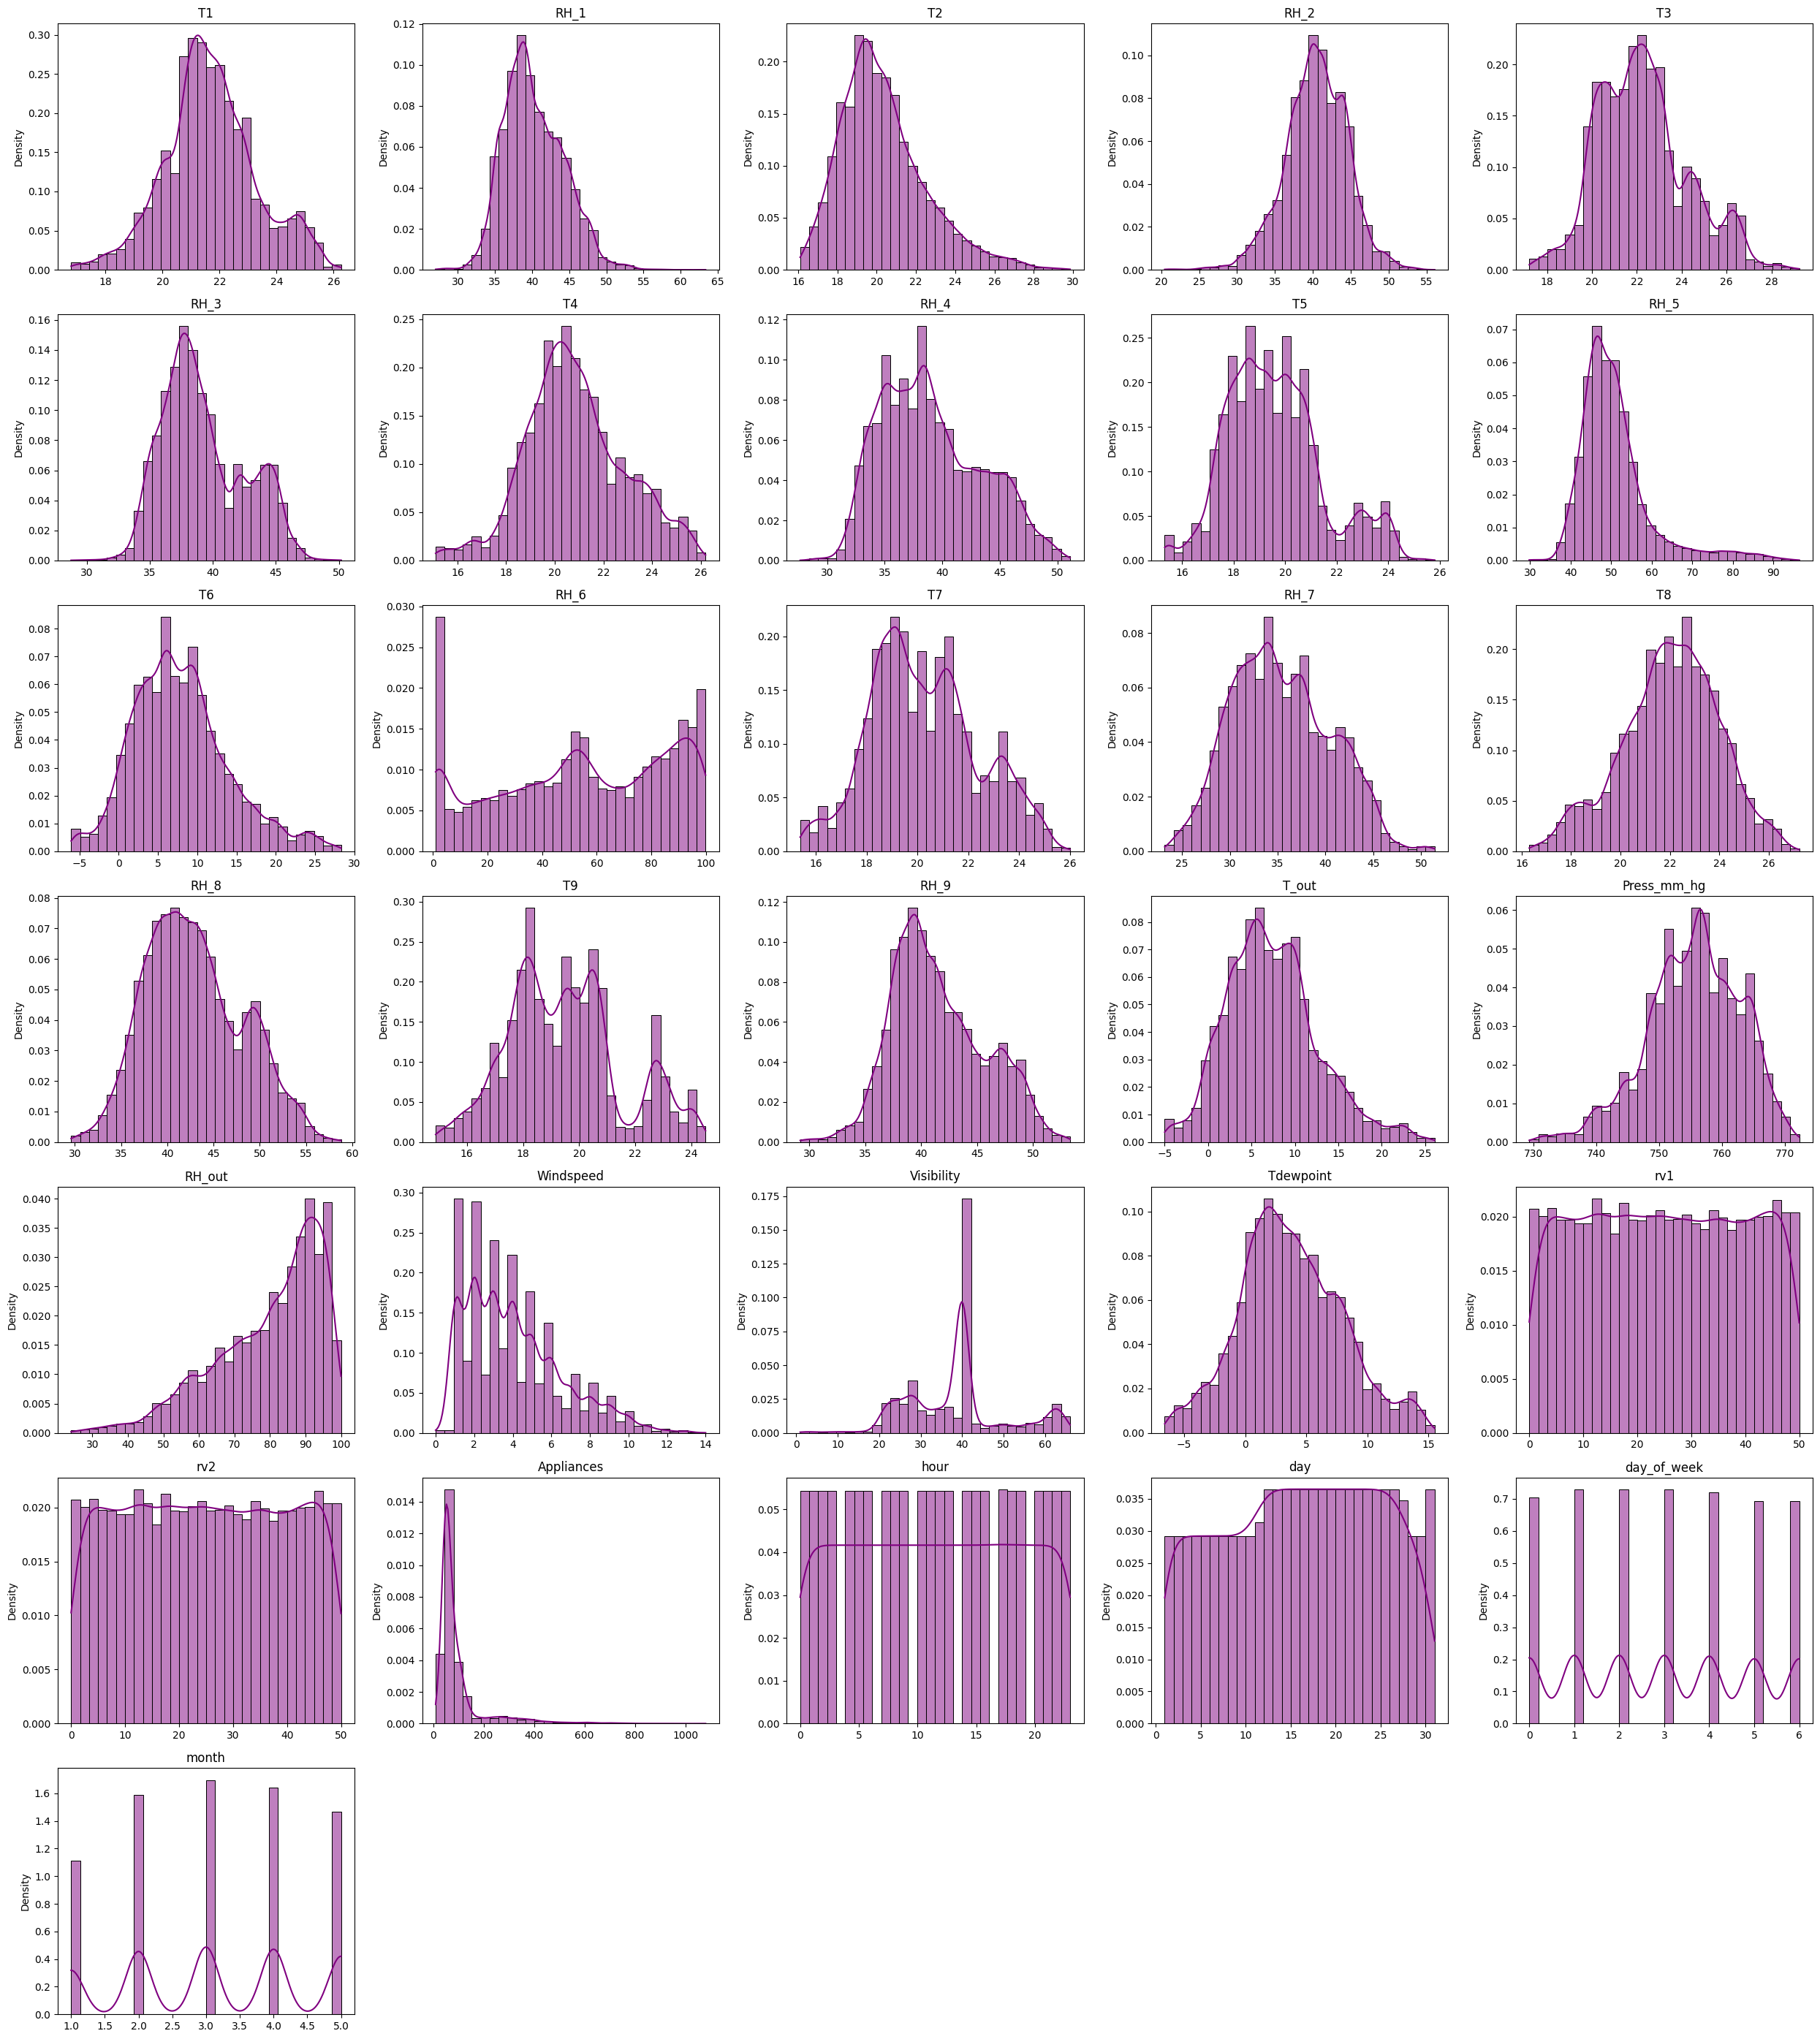

In [50]:
n_cols = 5
n_rows = math.ceil(len(numerical_features.columns) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(numerical_features[column], kde=True, color='purple', stat='density', bins=30)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

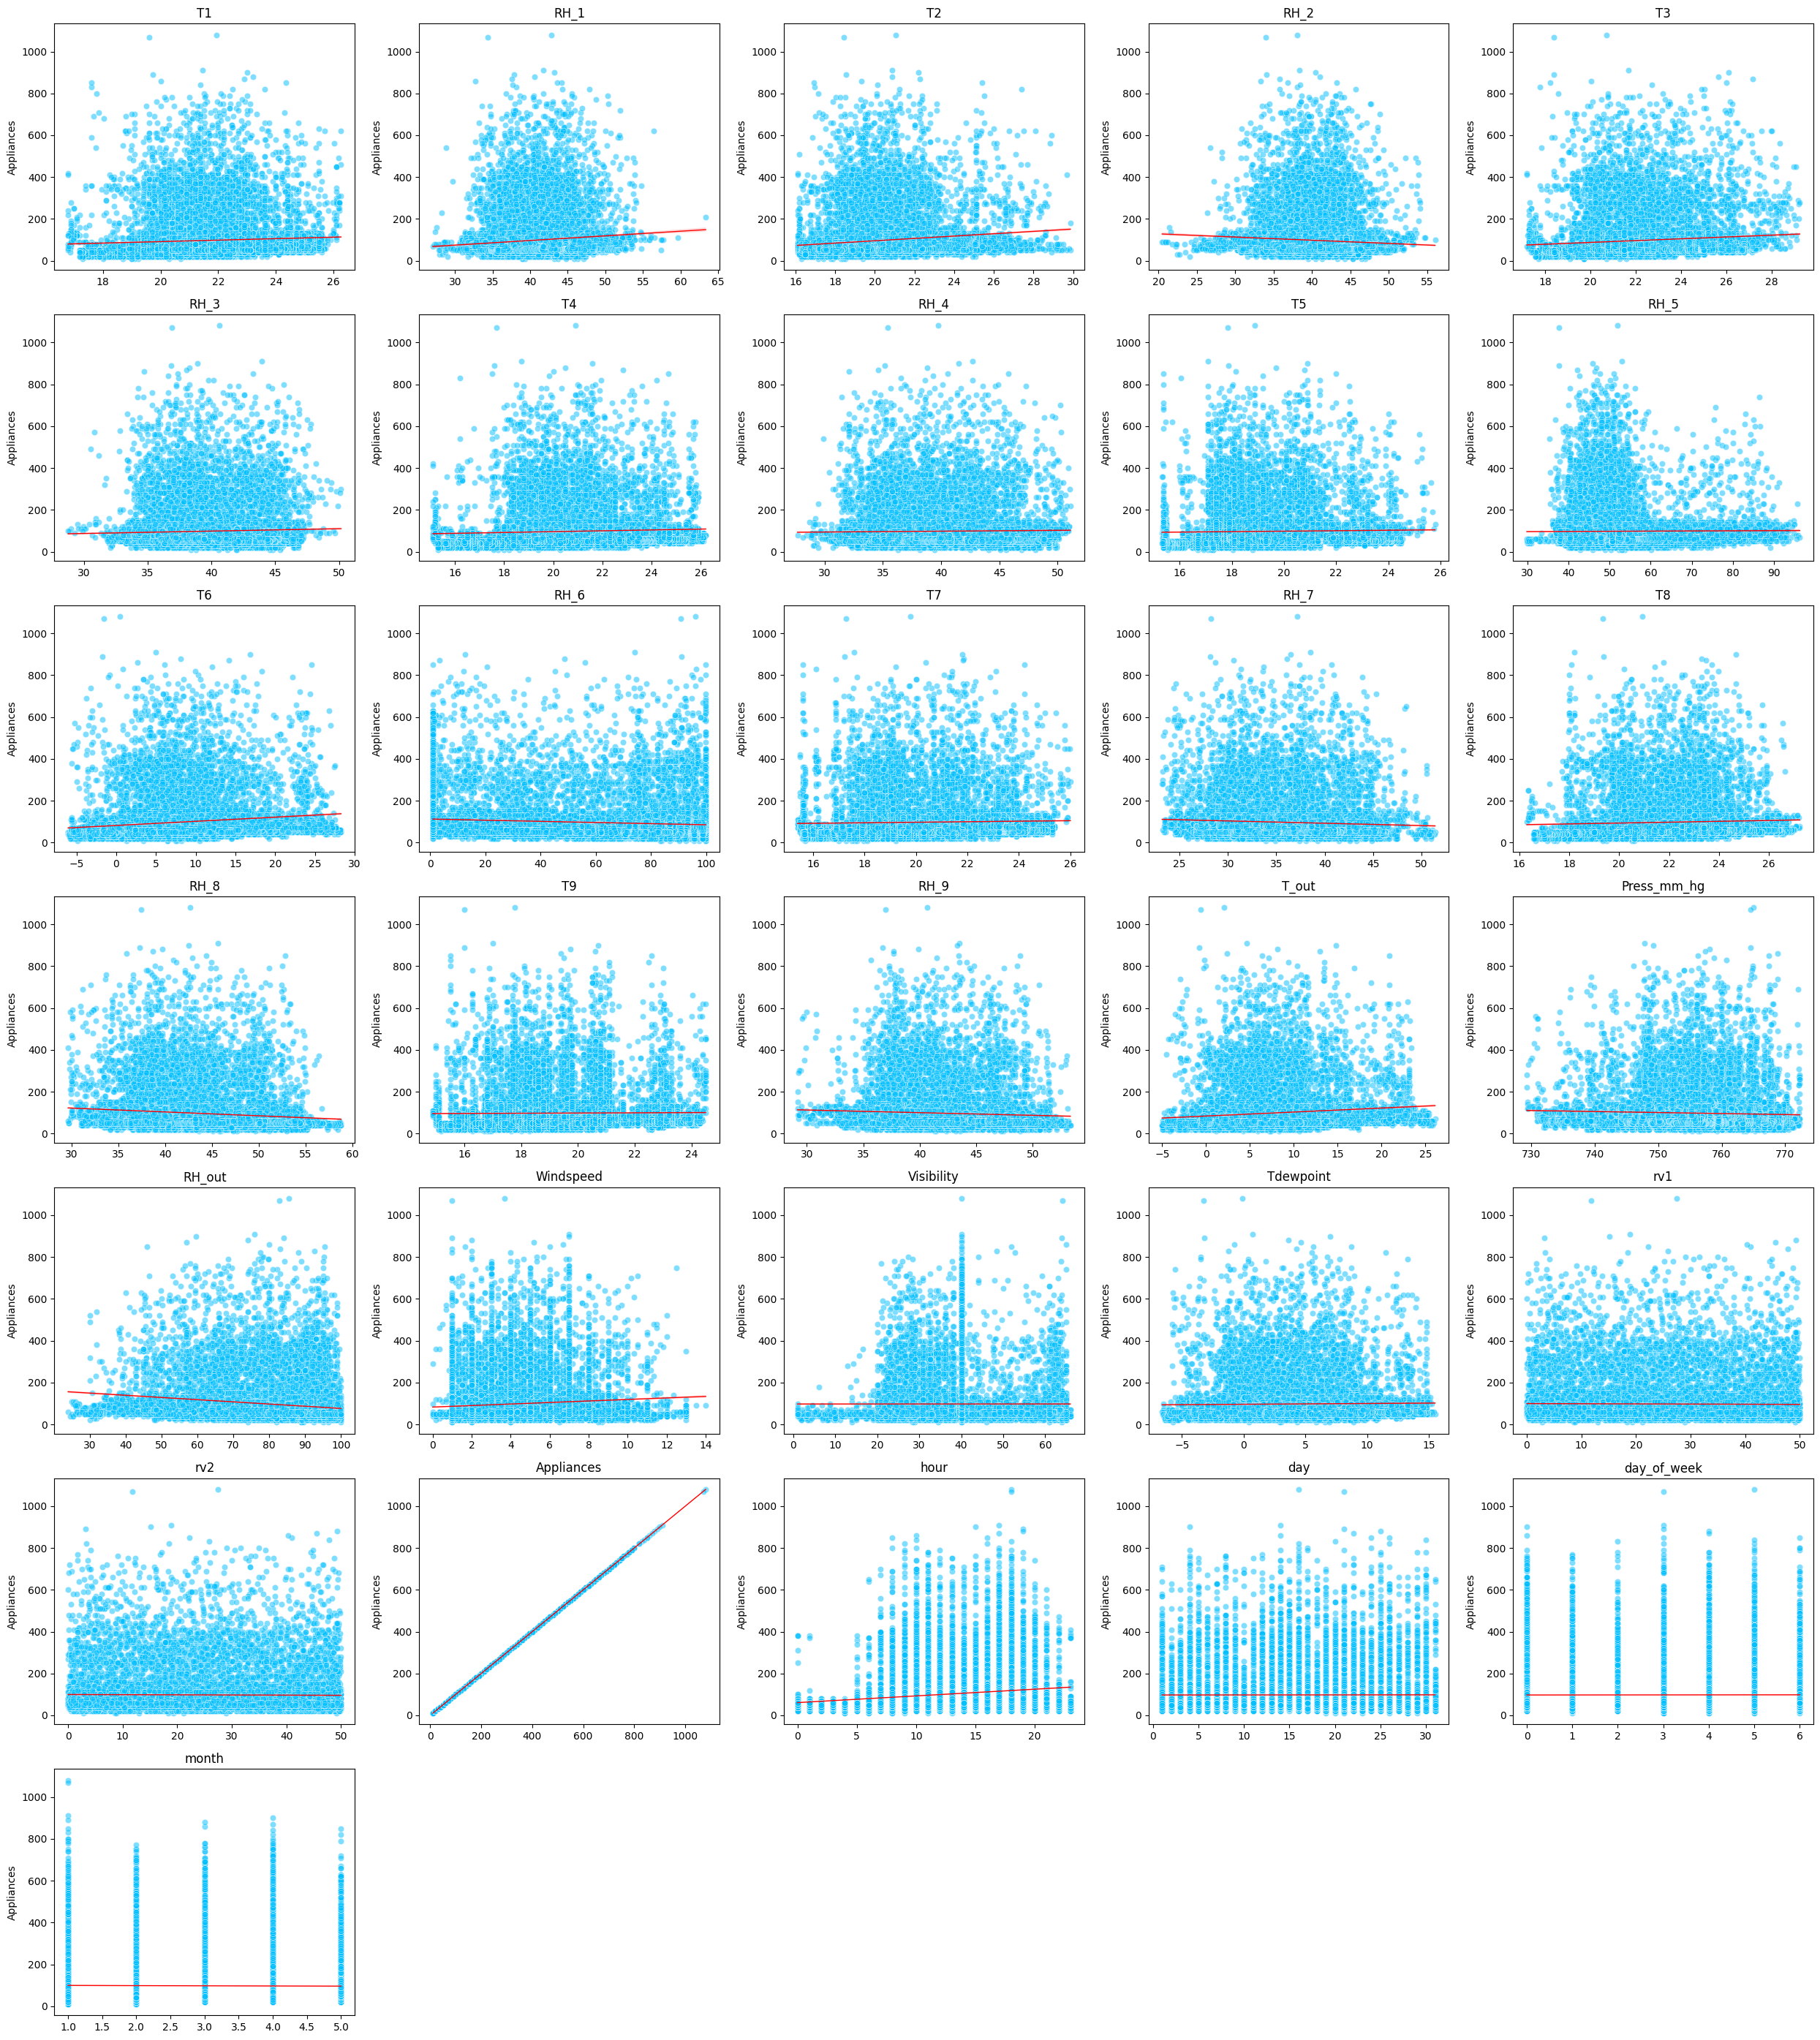

In [51]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=numerical_features[column], y=dependent_variable, color='deepskyblue', alpha=0.5)
    sns.regplot(x=numerical_features[column], y=dependent_variable, scatter=False, color='red', line_kws={'linewidth': 1})
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Appliances")
    
plt.tight_layout()
plt.show()

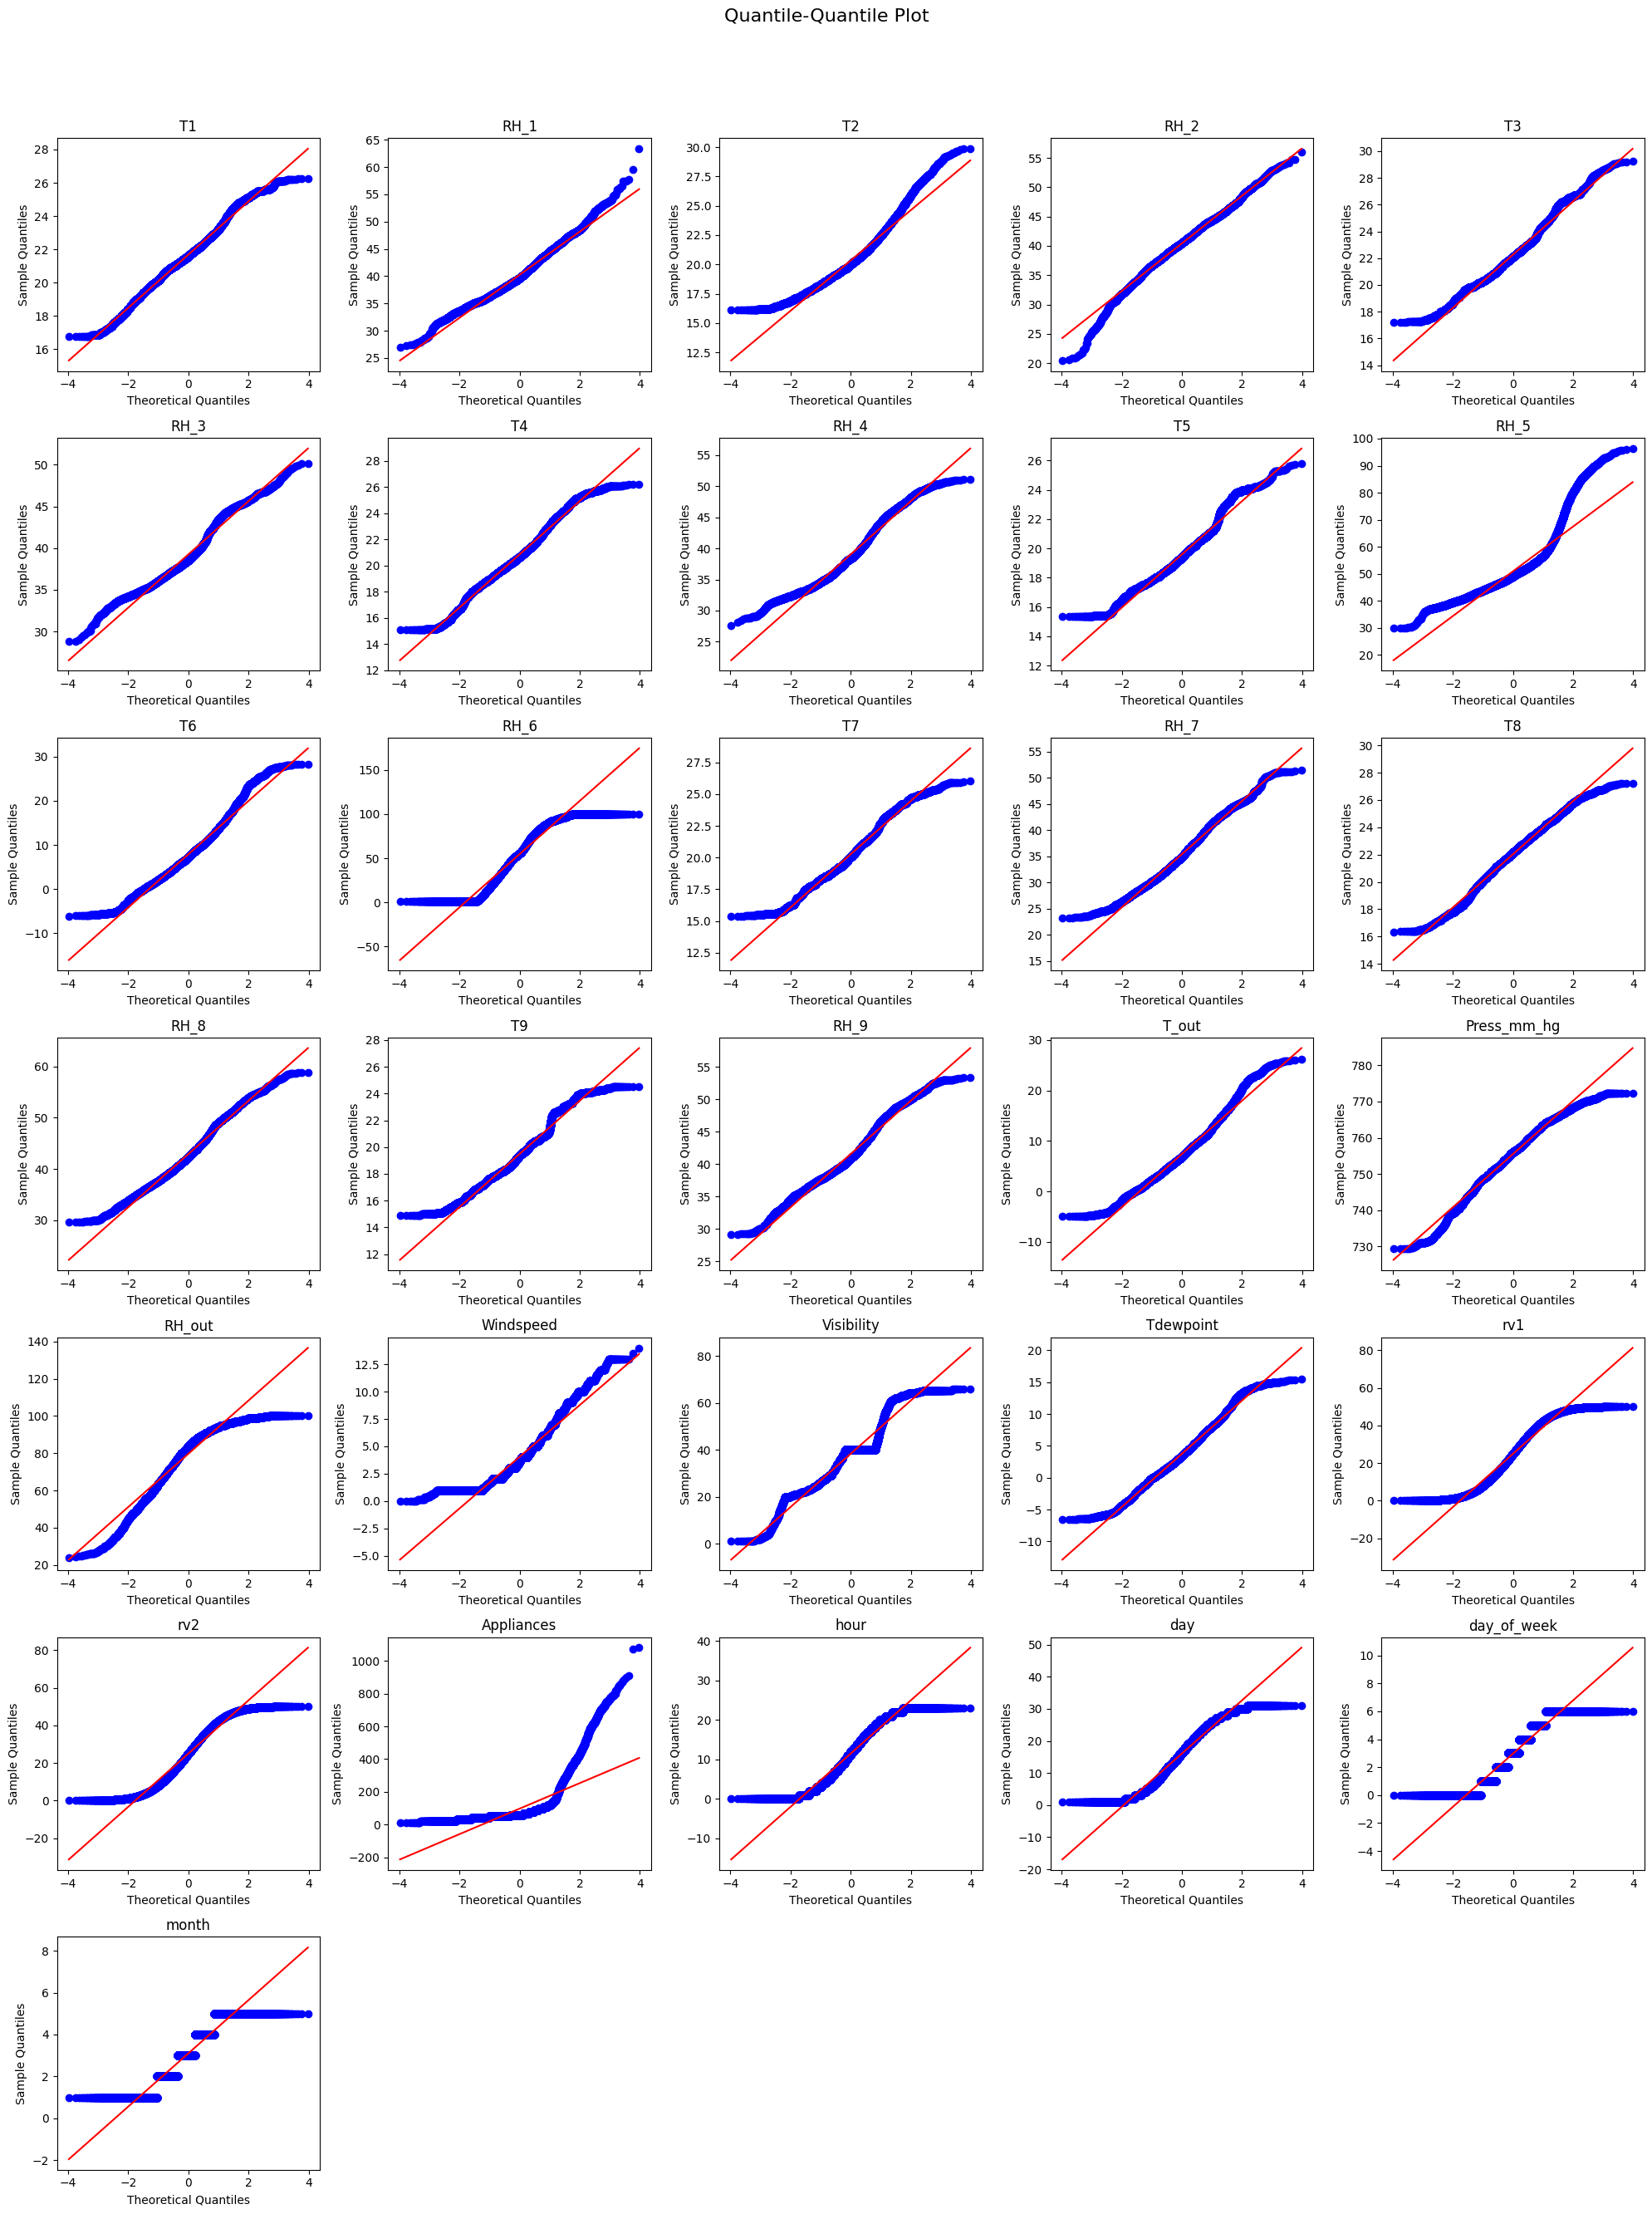

In [52]:
# Quantile-Quantile Plot for Normality Check
plt.figure(figsize=(n_cols * 4, n_rows * 4))
plt.suptitle("Quantile-Quantile Plot", fontsize=16)

# Plot each variable
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    stats.probplot(numerical_features[column].dropna(), dist="norm", plot=plt)
    plt.title(column)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

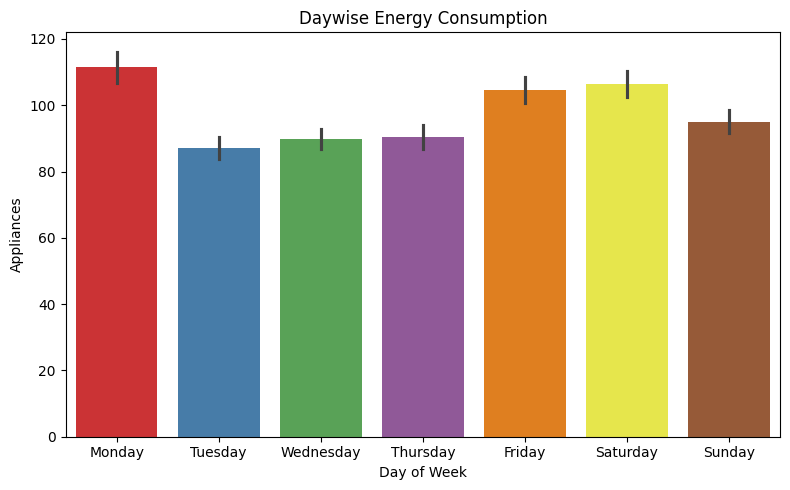

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='day_name', y='Appliances', hue = 'day_name' , legend= False, errorbar='ci', palette='Set1')  # Or try 'Set1'
plt.title("Daywise Energy Consumption")
plt.xlabel("Day of Week")
plt.ylabel("Appliances")
plt.tight_layout()
plt.show()

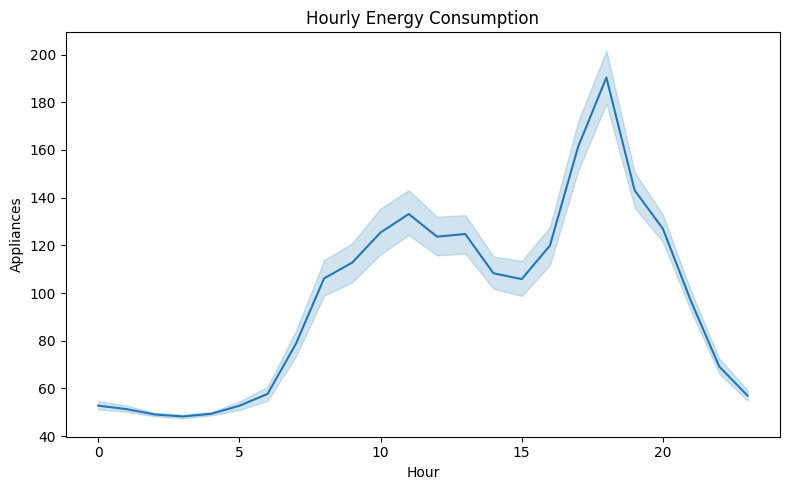

In [54]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=numerical_features, x='hour', y='Appliances', errorbar='ci')
plt.title("Hourly Energy Consumption")
plt.xlabel("Hour")
plt.ylabel("Appliances")
plt.tight_layout()
plt.show()

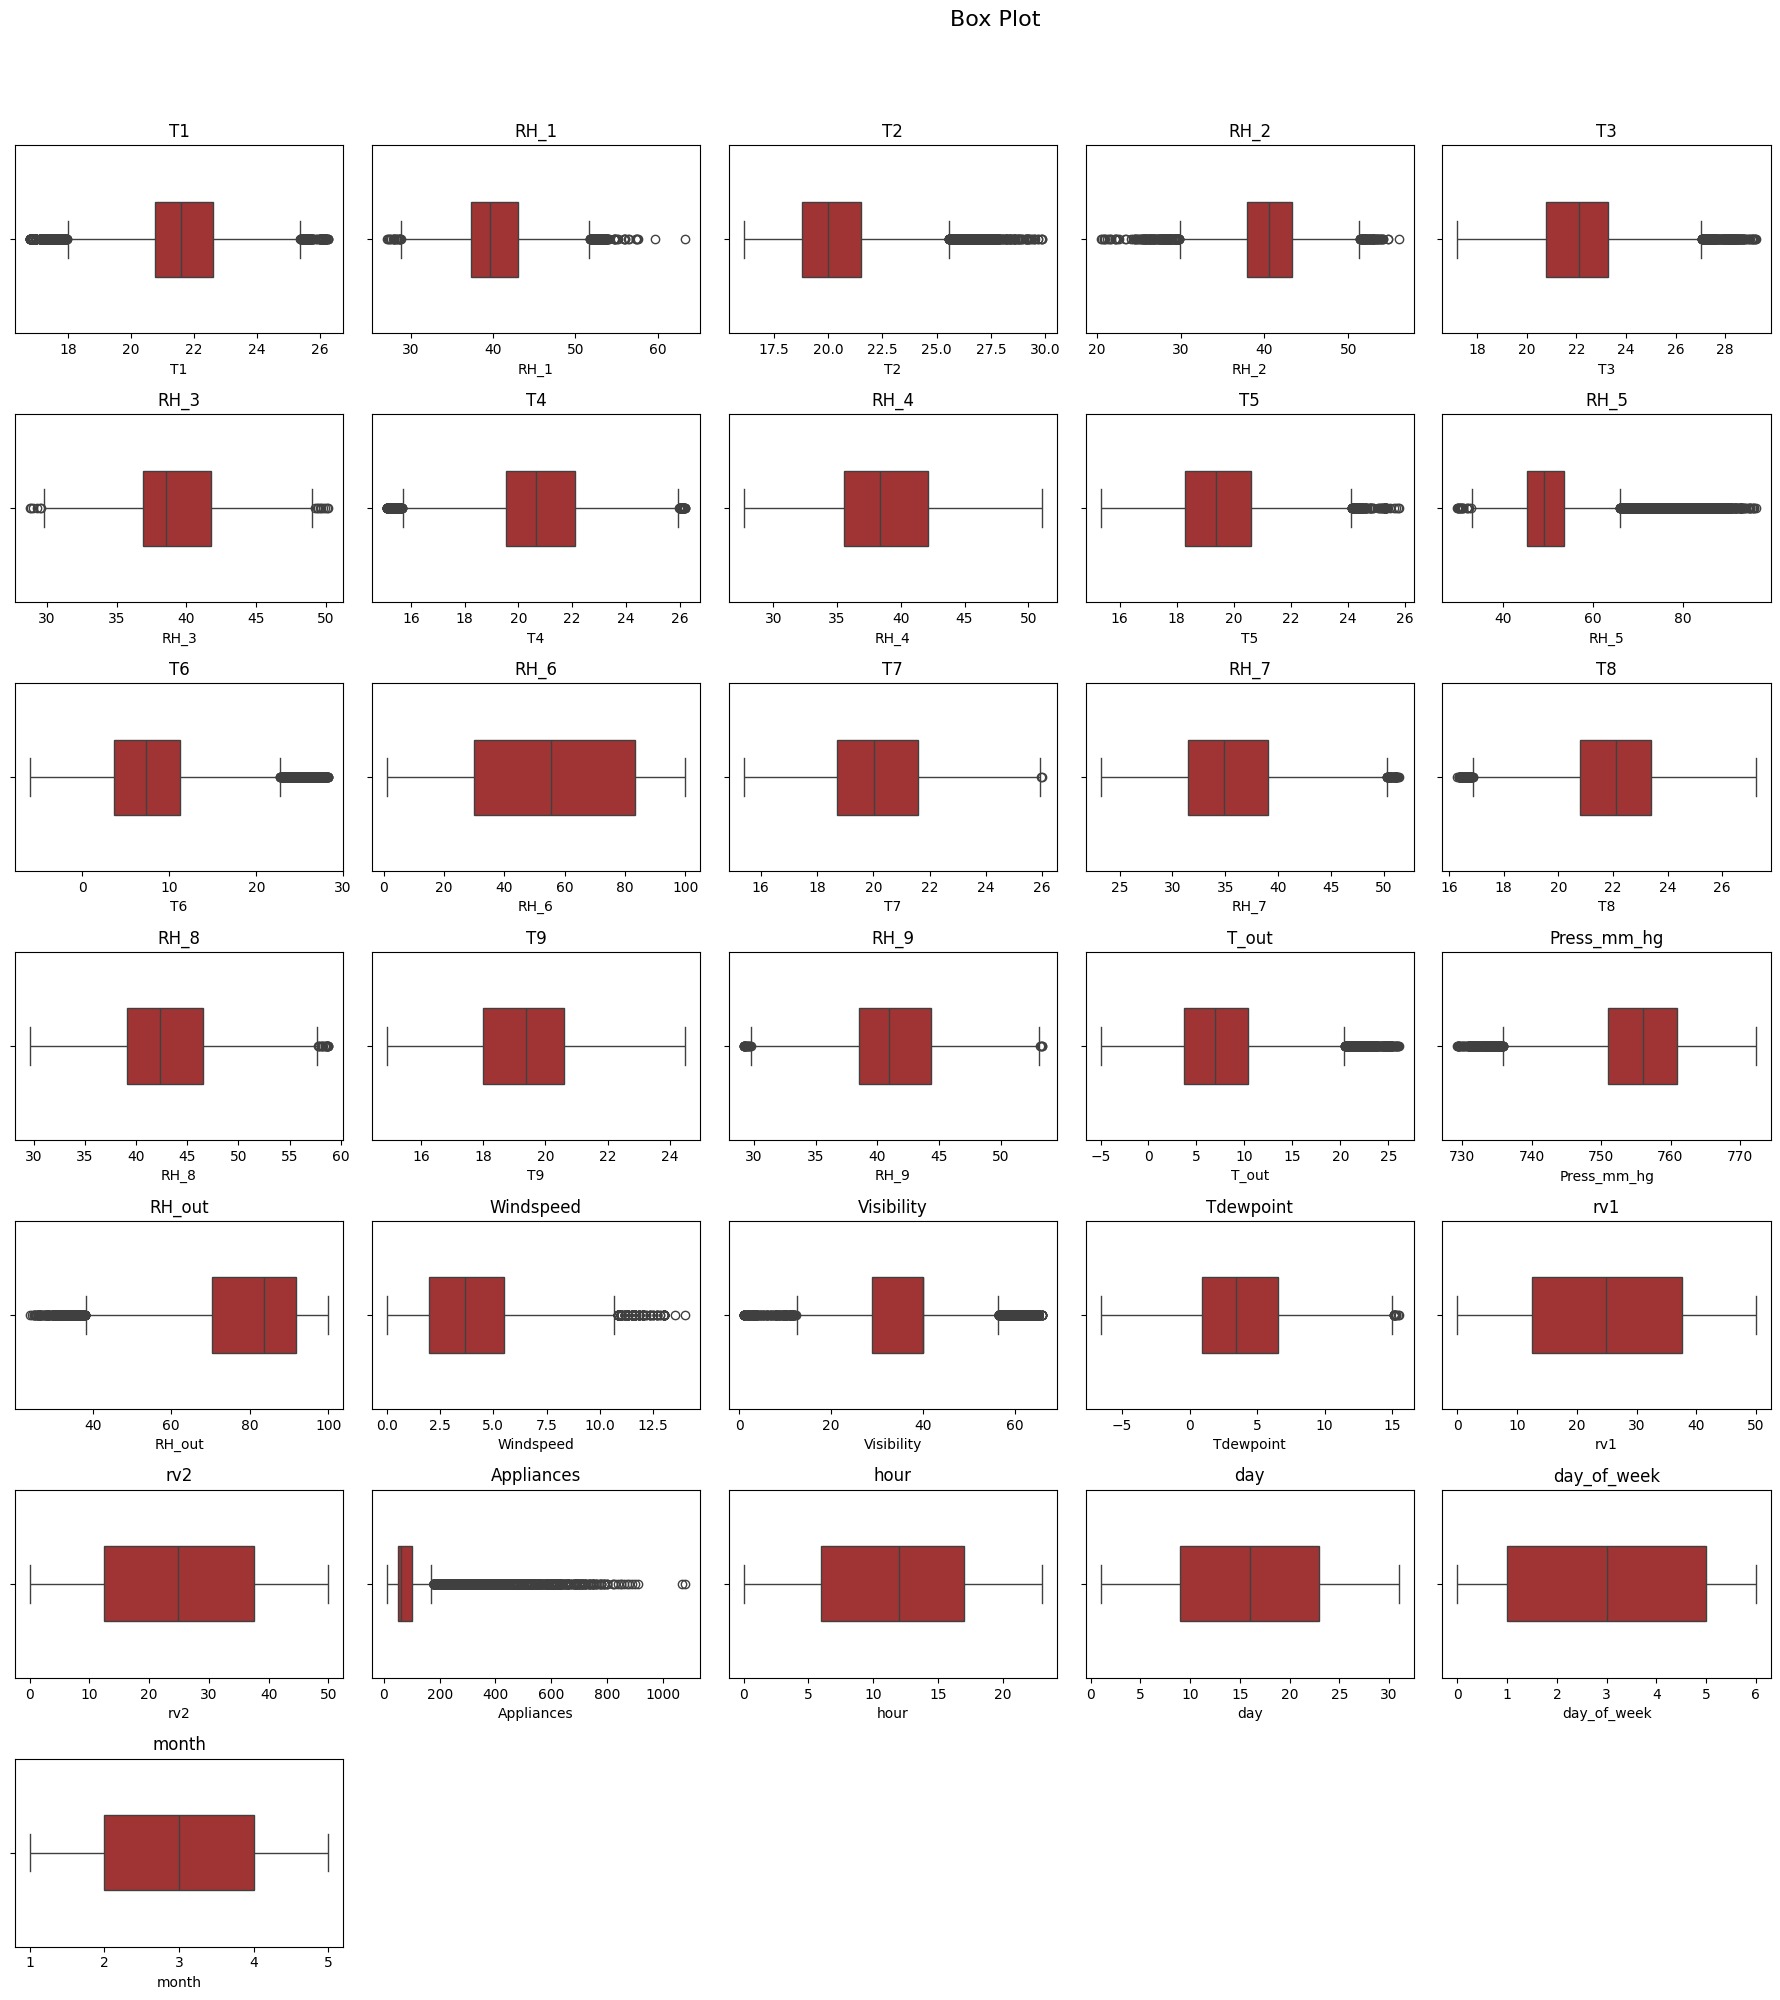

In [55]:
# Box plot 

# Create figure
plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle("Box Plot", fontsize=16)

# Plot each boxplot
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=numerical_features[column], color='firebrick', width=0.4)
    plt.title(column)

plt.tight_layout(rect=[0, 0.03, 0.90, 0.95])
plt.show()